# Machine Learning -- Regression

## Car Prediction

### Cars dataset with features including make, model, year, engine, and other properties of the car used to predict its price.



In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Loading and Reading a dataset
df =pd.read_csv('Car Prediction/data.csv')
df.head(10)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
5,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,31200
6,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,26,17,3916,44100
7,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,39300
8,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,36900
9,BMW,1 Series,2013,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,27,18,3916,37200


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [4]:
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


### Data Preperation

In [5]:
df.columns


Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [6]:
df.columns = df.columns.str.lower().str.replace(' ', '_')


In [7]:
# Check the data types
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [8]:
# group all the index with datatypes as object
strings = list(df.dtypes[df.dtypes == 'object'].index)
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [9]:
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [10]:
df.head(10)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500
5,bmw,1_series,2012,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,31200
6,bmw,1_series,2012,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,26,17,3916,44100
7,bmw,1_series,2012,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,39300
8,bmw,1_series,2012,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,36900
9,bmw,1_series,2013,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,27,18,3916,37200


### Exploratory data Analysis

In [11]:
# checking the unique values
for col in strings:
    print(col)
    print(df[col].unique()[:5]) # 5 unique values
    print(df[col].nunique()) # how many unique values are there
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16



### Distribution of Price(MSRP)

<AxesSubplot: xlabel='msrp', ylabel='Count'>

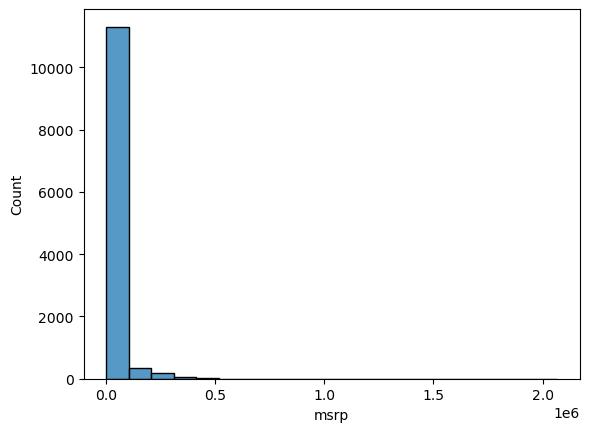

In [12]:
sns.histplot(df.msrp, bins=20)

<AxesSubplot: xlabel='msrp', ylabel='Count'>

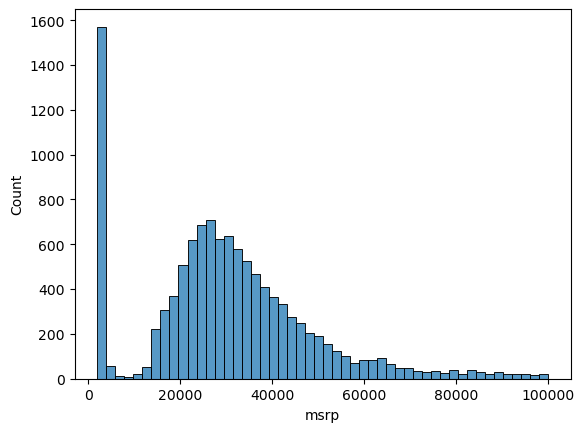

In [13]:
sns.histplot(df.msrp [df.msrp < 100000], bins=50)

In [14]:
price_logs = np.log1p(df.msrp)

sns.histplot(price_logs, bins=50)

Follows a normal distribution

## Mising Values 

In [15]:
# checking missing values
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

## Splitting the data into train,validation and test

In [16]:
n= len(df)
n_val = int (n*0.2)
n_test = int(n*0.2)
n_train = n-n_val-n_test


In [17]:
n, n_train,n_val,n_test

(11914, 7150, 2382, 2382)

In [18]:
df.iloc[[10,0,3,5]]

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
10,bmw,1_series,2013,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,39600
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
5,bmw,1_series,2012,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,31200


In [19]:
df_train = df.iloc[n_train:]
df_val = df.iloc[n_train:n_train+n_val]
df_test = df.iloc[n_train+n_val:]

In [20]:
 idx =np.arange(n)

In [21]:
df.iloc[idx[:10]]

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500
5,bmw,1_series,2012,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,31200
6,bmw,1_series,2012,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,26,17,3916,44100
7,bmw,1_series,2012,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,39300
8,bmw,1_series,2012,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,36900
9,bmw,1_series,2013,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,27,18,3916,37200


In [22]:
np.random.seed(20)
np.random.shuffle(idx)

In [23]:
df_train = df.iloc[idx[:n_train:]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [24]:
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
3326,oldsmobile,cutlass_supreme,1995,regular_unleaded,160.0,6.0,automatic,front_wheel_drive,2.0,NaN,midsize,coupe,26,17,26,2000
8655,acura,rsx,2006,regular_unleaded,155.0,4.0,manual,front_wheel_drive,2.0,"hatchback,luxury",compact,2dr_hatchback,31,24,204,21475
8745,chevrolet,s-10_blazer,1994,regular_unleaded,165.0,6.0,manual,four_wheel_drive,2.0,NaN,compact,2dr_suv,20,15,1385,2000
10438,nissan,titan,2014,regular_unleaded,317.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,17,12,2009,37320
9807,gmc,sonoma,2003,flex-fuel_(unleaded/e85),120.0,4.0,manual,rear_wheel_drive,2.0,flex_fuel,compact,regular_cab_pickup,25,19,549,16270


In [25]:
len(df_train),len(df_test),len(df_val)

(7150, 2382, 2382)

In [26]:
df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop = True)

In [27]:
#Target
y_train =np.log1p(df_train.msrp.values)
y_val =np.log1p(df_val.msrp.values)
y_test =np.log1p(df_test.msrp.values)

In [28]:
# drop the target variable
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

In [29]:
len(y_train)

7150

## Linear Regression

In [30]:
  df_train.iloc[10]

make                        volkswagen
model                       new_beetle
year                              2010
engine_fuel_type      regular_unleaded
engine_hp                        150.0
engine_cylinders                   5.0
transmission_type            automatic
driven_wheels        front_wheel_drive
number_of_doors                    2.0
market_category              hatchback
vehicle_size                   compact
vehicle_style            2dr_hatchback
highway_mpg                         29
city_mpg                            20
popularity                         873
Name: 10, dtype: object

In [31]:
xi =[631,19,12 ]

In [32]:
w0 = 7.17
w=[0.01,0.041,0.002]

In [33]:
def linear_regression(xi):
    n= len(xi)
    pred = w0
    for j in range(n):
        pred = pred+w[j]*xi[j]
    return pred

In [34]:
linear_regression(xi)

14.283

In [35]:
np.expm1(14.283)

1595981.3531385018

Linear Regression Vector Form

In [36]:
def dot(wi,w):
    n= len(xi)
    res = 0.0
    for j in range(n):
        res = res+xi[j]* w[j]
    return res
        

In [37]:
w_new =[w0]+w

In [38]:
w_new

[7.17, 0.01, 0.041, 0.002]

In [39]:
def linear_regression(xi):
    xi =[1]+xi
    return w0+dot(xi,w)


In [40]:
 linear_regression(xi)

14.283000000000001

## Training a Linear Regression model

In [41]:
X= [
    [148,24,1385],
    [132,24,2031],
    [453,11,86],
    [158,24,1385],
    [172 ,24,201],
    [413,11,86],
    [38,54,185],
    [142,25,431],
    [453,31,86], 
]
X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   24, 2031],
       [ 453,   11,   86],
       [ 158,   24, 1385],
       [ 172,   24,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [42]:
y =[1000 ,2000,15000,2500,1000,2000,1500,2500,1200]

In [43]:
# w0 = w_full[0]
# w= w_full[1:]

NameError: name 'w_full' is not defined

In [47]:
w0,w

(7.17, [0.01, 0.041, 0.002])

In [48]:
 def train_linear_regression(X,y):
       
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]
    pass

## Car Price Baseline Model

In [49]:
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [50]:
base =['engine_hp', 'engine_cylinders','highway_mpg', 'city_mpg', 'popularity']

In [51]:
df_train[base]

,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity
0,160.0,6.0,26,17,26
1,155.0,4.0,31,24,204
2,165.0,6.0,20,15,1385
3,317.0,8.0,17,12,2009
4,120.0,4.0,25,19,549
...,...,...,...,...,...
7145,265.0,4.0,25,19,640
7146,200.0,6.0,17,14,1385
7147,143.0,4.0,36,28,2202
7148,320.0,6.0,32,21,3916


In [52]:
X_train=df_train[base].values

In [53]:
df_train[base].isnull().sum()

engine_hp           41
engine_cylinders    18
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

In [54]:
X_train =df_train[base].fillna(0).values

In [55]:
w0,w = train_linear_regression(X_train,y_train)

In [56]:
y_pred = w0+X_train.dot(w)

<AxesSubplot: ylabel='Count'>

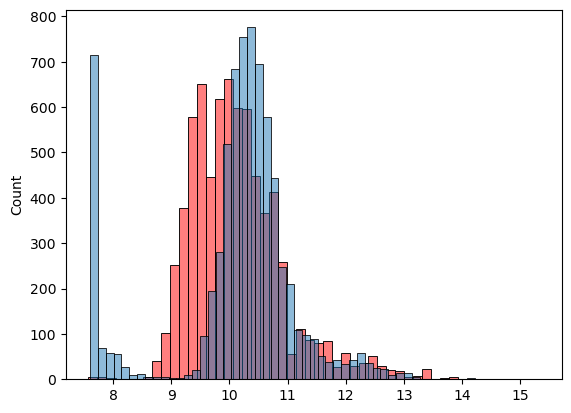

In [57]:
sns.histplot(y_pred,color= 'red',alpha=0.5,bins=50)
sns.histplot(y_train,alpha=0.5,bins=50)

## EVALUATION----RMSE

In [58]:
def rmse(y,y_pred):
    error = y-y_pred
    se= error**2
    mse = se.mean()
    return  np.sqrt(mse)

In [59]:
rmse(y_train,y_pred)

0.7505307481085262

## Validation the model

In [60]:
base =['engine_hp', 'engine_cylinders','highway_mpg', 'city_mpg', 'popularity']
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X= df_num.values
    return X

In [61]:
X_train = prepare_X(df_train)
w0,w = train_linear_regression(X_train,y_train)
X_val = prepare_X(df_val)
y_pred = w0+X_val.dot(w)

rmse(y_val,y_pred)

0.7688141072458707

## Feature Engineering

In [64]:
df.year.max()

2017

In [69]:
def prepare_X(df):
    df = df.copy()
    
    df['age']= 2017 - df.year
    features = base+['age']
    df_num = df[features]
    df_num = df_num.fillna(0)
    X= df_num.values
    return X

In [70]:
X_train = prepare_X(df_train)
w0,w = train_linear_regression(X_train,y_train)
X_val = prepare_X(df_val)
y_pred = w0+X_val.dot(w)

rmse(y_val,y_pred)

0.5217006325943742

<AxesSubplot: ylabel='Count'>

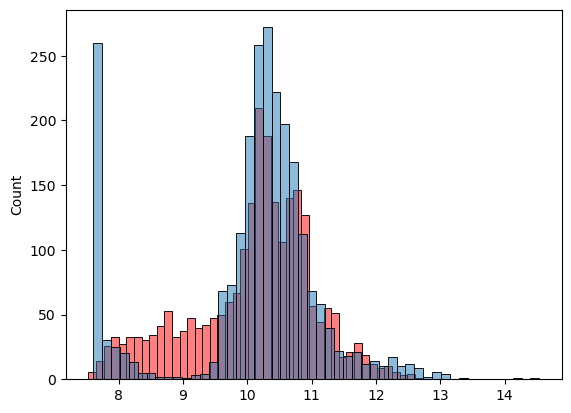

In [71]:
sns.histplot(y_pred,color ='red',alpha =0.5,bins=50)
sns.histplot(y_val,alpha =0.5,bins=50)

## Categorical variables

In [85]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df.year
    features.append('age')

    for v in [2, 3, 4]:
        feature = 'num_doors_%s' % v
        df[feature] = (df['number_of_doors'] == v).astype(int)
        features.append(feature)

    for v in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']:
        feature = 'is_make_%s' % v
        df[feature] = (df['make'] == v).astype(int)
        features.append(feature)
    for v in ['regular_unleaded', 'premium_unleaded_(required)', 
              'premium_unleaded_(recommended)', 'flex-fuel_(unleaded/e85)']:
        feature = 'is_type_%s' % v
        df[feature] = (df['engine_fuel_type'] == v).astype(int)
        features.append(feature)
    for v in ['automatic', 'manual', 'automated_manual']:
        feature = 'is_transmission_%s' % v
        df[feature] = (df['transmission_type'] == v).astype(int)
        features.append(feature)
        

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [86]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)
print('train:', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

train: 0.47380780300673736
validation: 0.4733838978193791


In [87]:
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'no_doors_%s %v'],
      dtype='object')

In [95]:
categorical_variables= ['make','engine_fuel_type','transmission_type','driven_wheels','driven_wheels','vehicle_size', 'vehicle_style']

In [97]:
categories ={}
for c in categorical_variables:
    categories[c] = list(df[c].value_counts().head().index)

In [98]:
categories

{'make': ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge'],
 'engine_fuel_type': ['regular_unleaded',
  'premium_unleaded_(required)',
  'premium_unleaded_(recommended)',
  'flex-fuel_(unleaded/e85)',
  'diesel'],
 'transmission_type': ['automatic',
  'manual',
  'automated_manual',
  'direct_drive',
  'unknown'],
 'driven_wheels': ['front_wheel_drive',
  'rear_wheel_drive',
  'all_wheel_drive',
  'four_wheel_drive'],
 'vehicle_size': ['compact', 'midsize', 'large'],
 'vehicle_style': ['sedan',
  '4dr_suv',
  'coupe',
  'convertible',
  '4dr_hatchback']}

In [104]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df.year
    features.append('age')
    
    for v in [2, 3, 4]:
        feature = 'num_doors_%s' % v
        df[feature] = (df['number_of_doors'] == v).astype(int)
        features.append(feature)
        categories ={}
    for c ,values in categories.items():
        for v in values:
            df['%s_%s' % (c,v)]= (df[c] == v).astype('int')
            features.append('%s_%s' % (c,v))
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X


In [105]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)
print('train:', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

train: 0.5150714135341501
validation: 0.5191088775279058


In [106]:
w0

9.315099760631288

In [107]:
w

array([ 3.50495229e-03,  8.41561331e-02, -4.02237800e-03,  1.04500614e-02,
       -5.22404576e-05, -9.38238706e-02, -1.59175760e+00, -1.75307615e+00,
       -1.64111598e+00])

## Regularization

In [120]:
def train_linear_regression_reg (X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [121]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression_reg(X_train, y_train,r=0.01)

y_pred = w_0 + X_train.dot(w)
print('train:', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

train: 0.5150726281735675
validation: 0.5190404355904019


In [ ]:

X_train = prepare_X(df_train)
w_0, w = train_linear_regression_reg(X_train, y_train,r=0.01)

y_pred = w_0 + X_train.dot(w)
print('train:', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

In [123]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

X_test = prepare_X(df_test)
y_pred = w_0 + X_test.dot(w)
print('test:', rmse(y_test, y_pred))

validation: 0.5190404355904019
test: 0.5114824714564992


## Tuning the model

In [130]:
X_train = prepare_X(df_train)
X_val = prepare_X(df_val)

for r in [0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_val.dot(w)
    print('%6s' %r, rmse(y_val, y_pred))
    

 1e-06 0.5191088702281673
0.0001 0.519108148041709
 0.001 0.5191016245604438
  0.01 0.5190404355904019
   0.1 0.5187488890211422
     1 0.5223356390262495
     5 0.5289117134982256
    10 0.5324820020283312


In [126]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

X_test = prepare_X(df_test)
y_pred = w_0 + X_test.dot(w)
print('test:', rmse(y_test, y_pred))

validation: 0.5190404355904019
test: 0.5114824714564992


Using the Model

In [131]:
df_full_train = pd.concat([df_train ,df_val])

In [133]:
df_full_train = df_full_train.reset_index(drop=True)

In [134]:
X_full_train = prepare_X(df_full_train)

In [135]:
X_full_train

array([[160.,   6.,  26., ...,   1.,   0.,   0.],
       [155.,   4.,  31., ...,   1.,   0.,   0.],
       [165.,   6.,  20., ...,   1.,   0.,   0.],
       ...,
       [283.,   6.,  24., ...,   0.,   0.,   1.],
       [180.,   6.,  24., ...,   0.,   0.,   1.],
       [127.,   4.,  28., ...,   0.,   0.,   1.]])

In [136]:
y_full_train = np.concatenate([y_train,y_val])

In [137]:
w_0, w = train_linear_regression_reg(X_train, y_train, r=0.01)


In [138]:
w

array([ 3.50555577e-03,  8.42483609e-02, -3.99606977e-03,  1.04704996e-02,
       -5.22329678e-05, -9.38100240e-02, -1.53636759e+00, -1.69739631e+00,
       -1.58570112e+00])

In [139]:
X_test = prepare_X(df_test)
y_pred = w_0 + X_test.dot(w)
print('test:', rmse(y_test, y_pred))

test: 0.5114824714564992


In [142]:
car =df_test.iloc[20].to_dict()
car

{'make': 'ford',
 'model': 'ranger',
 'year': 2011,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 143.0,
 'engine_cylinders': 4.0,
 'transmission_type': 'manual',
 'driven_wheels': 'rear_wheel_drive',
 'number_of_doors': 2.0,
 'market_category': nan,
 'vehicle_size': 'compact',
 'vehicle_style': 'extended_cab_pickup',
 'highway_mpg': 27,
 'city_mpg': 22,
 'popularity': 5657}

In [148]:
df_small = pd.DataFrame([car])

df_small

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,ford,ranger,2011,regular_unleaded,143.0,4.0,manual,rear_wheel_drive,2.0,NaN,compact,extended_cab_pickup,27,22,5657


In [152]:
x_small =prepare_X(df_small)

In [153]:
y_pred = w0 +x_small.dot(w)
y_pred = y_pred[0]
y_pred

7.8811351541962065

In [154]:
np.expm1(y_pred)

2645.8754667917656

In [155]:
np.expm1(y_test[10])

23284.99999999999